In [2]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, IPython.display
import essentia, essentia.standard as ess
import urllib.request
import librosa.display
#data = urllib.request.urlretrieve("http://...")

plt.rcParams['figure.figsize'] = (14,4)

In [3]:
#url = 'http://audio.musicinformationretrieval.com/'
#urllib.request.urlretrieve(url, filename='simple_loop.wav')

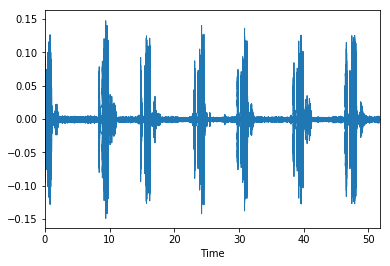

In [4]:
#x, fs = librosa.load('Simple_Loop.wav')
#x, fs = librosa.load('OSR_us_000_0010_8k.wav')
#x, fs = librosa.load('CrownedEagle.wav')
x, fs = librosa.load('Sombre Greenbul 1.wav')
librosa.display.waveplot(x, sr=fs)

In [5]:
IPython.display.Audio(x, rate=fs)

In [6]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)

(20, 2228)


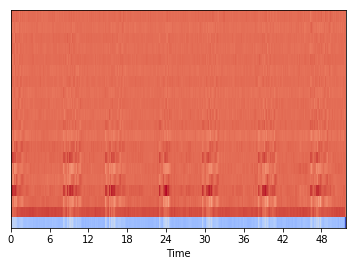

In [7]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

In [8]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 8.23757579e-15 -5.71057265e-15  3.35109957e-17 -7.40680208e-16
 -4.66762077e-16  2.59118480e-17 -6.88956173e-16 -1.24077887e-16
 -1.05311730e-15  6.39624001e-16 -3.71286883e-16  4.21017699e-16
 -3.98992628e-16  7.74664593e-16 -6.48942300e-16  3.26887928e-17
 -4.52261408e-16  7.89613736e-16  6.64738561e-17 -2.17260879e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


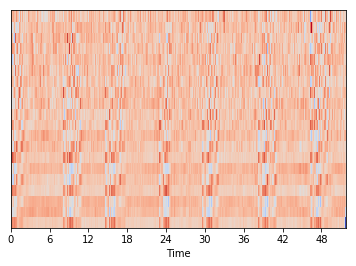

In [9]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

In [10]:
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print(mfccs.shape)

(2282, 13)


In [11]:
mfccs = sklearn.preprocessing.scale(mfccs)

/home/iordan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/iordan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Text(0.5,0,'Frame Index')

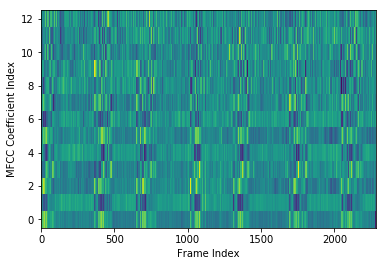

In [12]:
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')